# CS-6580 Assignment 6 - Data Visualization

**Rob Christiansen**

*Weber State University*

In this assignment, you will design a visualization for a small data set and provide a rationale for your design choices.

### Dataset - U.S. Population, 1900 vs. 2000

Every 10 years, the census bureau documents the demographic make-up of the United States, influencing everything from congressional districting to social services. The dataset we will use contains a high-level summary of census data for two years a century apart: 1900 and 2000. The data is a CSV file that describes the U.S. population in terms of year, reported sex (1: male, 2: female), age group (binned into 5 year segments from 0-4 years old up to 90+ years old), and the total count of people per group. There are 38 data points per year. [Source](https://ipums.org/)

We'll start by importing our standard libraries, but if you'd like to use any others feel free to import those as well.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import gdown

In [2]:
# url = 'https://drive.google.com/uc?id=1JdFhG9E2pkVQ88-IYZ830wbj2_yMx0ut'
output = 'census2000.csv'

# gdown.download(url, output, quiet=False)

In [3]:
census_data = pd.read_csv(output)

### Your Assignment

Start by choosing a question you'd like a visualization to answer. Design a static visualization (i.e., a single image) that you believe effectively answers that question, and use the question as the title of your graphic.

Provide a short write-up (no more than 4 paragraphs, but it doesn't need to be 4 paragraphs) describing your design. While you must use the data set given, you are free to transform the data as you see fit. Such transforms may include (but are not limited to) log transformation, computing percentages or averages, grouping elements into new categories, or removing unnecessary variables or records. You are also free to incorporate external data as you see fit. Your chart image should be interpretable without recourse to your short write-up. Do not forget to include title, axis labels or legends as needed!

As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story are you trying to tell? Just as important, also note which aspects of the data might be obscured or down-played due to your visualization design.

In [4]:
census_data


,Sex,Year,Age,People
0,1,1900,0,4619544
1,1,2000,0,9735380
2,1,1900,5,4465783
3,1,2000,5,10552146
4,1,1900,10,4057669
...,...,...,...,...
71,2,2000,80,3221898
72,2,1900,85,48614
73,2,2000,85,1981156
74,2,1900,90,20093


In [5]:
# Determine the scale 
census_data.groupby(by=['Year']).agg({'People':sum})

,People
Year,
1900,76262821
2000,281420717


In [6]:
census_data['People(mm)']  = census_data['People'] / 10**6

In [7]:
# Define dataframes based on year and sex
data_1900_1 = census_data.loc[(census_data['Year']==1900) & (census_data['Sex']==1)]
data_1900_2 = census_data.loc[(census_data['Year']==1900) & (census_data['Sex']==2)]
data_2000_1 = census_data.loc[(census_data['Year']==2000) & (census_data['Sex']==1)]
data_2000_2 = census_data.loc[(census_data['Year']==2000) & (census_data['Sex']==2)]


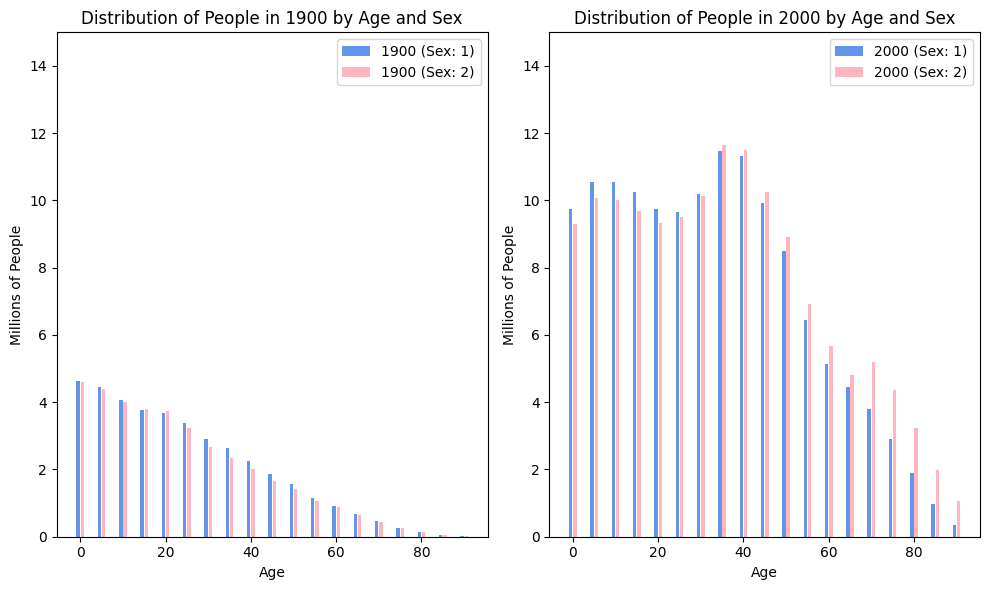

In [16]:
# Create a list of colors with different shades of blue
colors = ['cornflowerblue', 'lightpink']
ymin = 0
ymax = 15
xlabel = 'Age'
ylabel = 'Millions of People'


# Create the bar plot
plt.figure(figsize=(10, 6))

# Plot the bar plots for each dataframe with a specific color and label

plt.subplot(1, 2, 1)
bars1 = plt.bar(data_1900_1['Age'] - 1/2, data_1900_1['People(mm)'], color=colors[0], label=f'1900 (Sex: 1)')
bars2 = plt.bar(data_1900_2['Age'] + 1/2, data_1900_2['People(mm)'], color=colors[1], label=f'1900 (Sex: 2)')
ax = plt.gca()
ax.set_ylim([ymin, ymax])

plt.xlabel(xlabel) 
plt.ylabel(ylabel) 
plt.title('Distribution of People in 1900 by Age and Sex')
plt.legend()


plt.subplot(1, 2, 2)
bars3 = plt.bar(data_2000_1['Age'] - 1/2 * (bar_width / n_datasets), data_2000_1['People(mm)'], color=colors[0], label=f'2000 (Sex: 1)')
bars4 = plt.bar(data_2000_2['Age'] + 1/2 * (bar_width / n_datasets), data_2000_2['People(mm)'], color=colors[1], label=f'2000 (Sex: 2)')
ax = plt.gca()
ax.set_ylim([ymin, ymax])

plt.xlabel(xlabel) 
plt.ylabel(ylabel) 
plt.title('Distribution of People in 2000 by Age and Sex')

# Add legend
plt.legend()

# Show the plot
# plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Source: [Python Graph Gallery](https://python-graph-gallery.com/density-mirror/)

AttributeError: Rectangle.set() got an unexpected keyword argument 'stat'

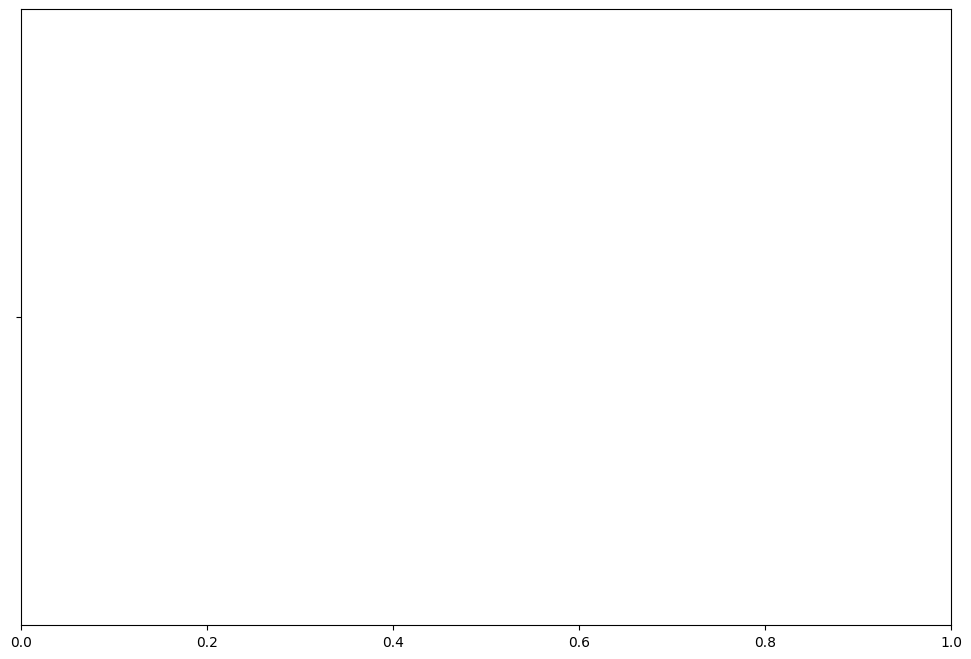

In [9]:
# libraries
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# dataframe
df = pd.DataFrame({
'var1': np.random.normal(size=1000),
'var2': np.random.normal(loc=2, size=1000) * -1
})

# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot bar chart for var1
sns.barplot(x=data_1900_1['Age'], stat="density", bins=20, edgecolor='black')

# plot histogram chart for var2
n_bins = 20
# get positions and heights of bars
heights, bins = np.histogram(df.var2, density=True, bins=n_bins) 
# multiply by -1 to reverse it
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2) * -1

# plot
plt.bar(bin_pos, heights, width=bin_width, edgecolor='black')

# show the graph
plt.show()

In [ ]:
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/email_campaign_funnel.csv"

# Original url (to be used in case the above one does not work)
url = "https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv"
df = pd.read_csv(url)

In [ ]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(4, 8))

# Define the column in the dataframe that represents the groups/categories
group_col = 'Gender'

# Determine the order of bars on the y-axis by unique values in the 'Stage' column and reversing the order
order_of_bars = df.Stage.unique()[::-1]

# Generate a list of colors for each group, using the Spectral colormap
colors = [plt.cm.Spectral(i / float(len(df[group_col].unique()) - 1)) for i in range(len(df[group_col].unique()))]

# Iterate through each group and plot a bar for each stage within that group
for color, group in zip(colors, df[group_col].unique()):
    
    # Create a bar plot using Seaborn's barplot function
    sns.barplot(x='Users',  # Data for the width of bars
                y='Stage',  # Data for the y-axis (stages of purchase)
                data=df.loc[df[group_col] == group, :],  # Filter data for the current group
                order=order_of_bars,  # Specify the order of stages on the y-axis
                color=color,  # Assign a color to the bar
                label=group,  # Assign a label for the plot legend
                ax=ax,  # Specify the axis to plot on (previously created)
               )

# Set labels and title for the axes
ax.set_xlabel("Users")  # X-axis label
ax.set_ylabel("Stage of Purchase")  # Y-axis label
ax.set_title("Population Pyramid of the Marketing Funnel", fontsize=22) # Plot title

# Display the legend, which shows labels for the groups
ax.legend()

# Display the plot
plt.show()